# Double/Triple Integrals & Animation

Initialisation. Run cell below. 

In [4]:
from sympy import init_printing
init_printing()

## Question 0:

Using the following result as what should be expected:

$$
\iint xy \ dx \ dy = \frac{x^2 y^2}{4}
$$

Why is the code below not returning the same value? 

Fix the code so that it runs and obtains the result as expected.



In [15]:
from sympy import integrate
from sympy.abc import x,y

########### Beginning BROKEN code #############
f = x*y
integrate(f,x)
integrate(f,y)
########### End BROKEN code #############


## Answer 0:

The answer is as simple as ensuring that the output of the integration function is assigned to the `f` variable. The function is returning you back the result but in the broken code you're not saving it. 

In [14]:
from sympy import integrate
from sympy.abc import x,y

########### Beginning FIXED code #############
f = x*y
f = integrate(f,x)
integrate(f,y)
########### End FIXED code #############

## Question 1:

(i) Integrate the following function, plotting its 2D domain in 3D and the volume it inhabits in a 3D plot.

(ii) Get a numeric answer for the integral, using the `sympy` `N()` function.

(iii) Plot the resulting function over the appropriate domain
$$
x \in [5,10] \quad y \in [0, \pi] 
$$

$$
\iint \sin (x) \sin(y) \ dA
$$

## Answer 1:

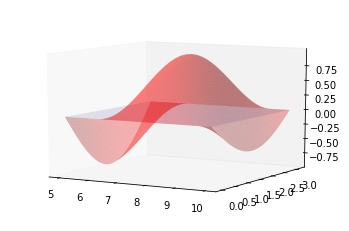

In [59]:
# Answer (i)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Setup for 3D plotting
fig = plt.figure(1)
ax = fig.gca(projection='3d')

# Setup domain
x_ = np.linspace(5,10)
y_ = np.linspace(0, np.pi)
x , y = np.meshgrid(x_,y_)

# Plot the domain
ax.plot_surface(x, y, np.zeros(x.shape), color='b', alpha=0.1)

# Plot the function we're integrating
f = np.sin(x)*np.sin(y) 
ax.plot_surface(x,y,f, color='r', alpha=0.3)
ax.view_init(10) # Change the height 

# Make it pretty
ax.grid(False)

In [63]:
# Answer (ii)

from sympy import integrate, Symbol, sin, pi, N
x = Symbol('x')
y = Symbol('y')
f = sin(x)*sin(y)

# Symbolic
Fx = integrate(f, x)
F = integrate(Fx, y)
display('Symbolic')
display(F)

# Numeric
display('Numeric')
Fx = integrate(f, (x, 5,10))
F = integrate(Fx, (y, 0, pi))

display(F)
display(N(F))

'Symbolic'

'Numeric'

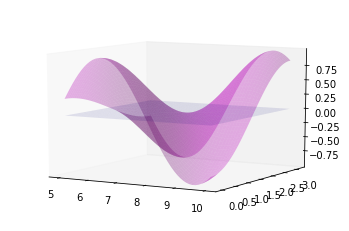

In [65]:
# Answer (iii)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Setup for 3D plotting
fig = plt.figure(1)
ax = fig.gca(projection='3d')

# Setup domain
x_ = np.linspace(5,10)
y_ = np.linspace(0, np.pi)
x , y = np.meshgrid(x_,y_)

# Plot the domain
ax.plot_surface(x, y, np.zeros(x.shape), color='b', alpha=0.1)

# Plot the function we're integrating
f = np.cos(x)*np.cos(y) 
ax.plot_surface(x,y,f, color='m', alpha=0.3)
ax.view_init(10) # Change the height 

# Make it pretty
ax.grid(False)

## An aside on `Symbol()`

You can create symbols that are not just english letters, but also the greek letters that are so frequently used in mathematics.

e.g.

In [19]:
display(Symbol('theta'))
display(Symbol('omega'))
display(Symbol('gamma'))

If you would prefer the capital letter of the Greek alphabet, it follows $\LaTeX$ (pronounced '_lah-tek_') syntax in that you must capitalise the first letter of the word.

e.g.

In [18]:
display(Symbol('Theta'))
display(Symbol('Omega'))
display(Symbol('Gamma'))

If you want subscripts or superscripts on your symbols, you must add underscores and carets, respectively. 

e.g.

In [26]:
display(Symbol('x_a'))
display(Symbol('y_b'))
display(Symbol('z_c'))

In [30]:
display(Symbol('x^a'))
display(Symbol('y^b'))
display(Symbol('z^c'))

If the text you wish to subscript/superscript is longer than one character, you must enclose it in `braces` (`{}`).

e.g.

In [29]:
display(Symbol('x_{hello}'))
display(Symbol('y_{world}'))

In [31]:
display(Symbol('x^{hello}'))
display(Symbol('y^{world}'))

## Factorising with `factor`

Sometimes the output of an `integrate` or `diff` gives a function that can be easily factorised.

This can be done in one line by the `factor` function.

e.g.

In [46]:
from sympy import Symbol, factor
x = Symbol('x')
f = x**2+2*x+1
display(f)
display(factor(f))

But if the expression is not inherently factorisable, you will simply be returned the function.

e.g.

In [49]:
f = 3*x**2 + 4*x + 5
display(f)
display(factor(f))

More examples and nuances can be seen about `factor`by running the cell below.

In [ ]:
from sympy import factor
help(factor)

## Question 2:

We are tasked with determining the density ($\rho$) of a cylindrical rod of length, $L$.

We are told the density increases linearly along the height ($z$) of the rod with proporttion to a constant, $a$, giving:

$$
\rho_z (z) = az
$$


But the matter is complicated when we're told that its density varies with the length of the radius from the centre. 

Because of the way the rod is manufactured, the centre is of a higher density than the edge. The density drops off exponentially from the centre to the edge.

$$ 
\rho_r (r) = \rho_0 e^{-r}
$$

Where $\rho_0$ is some constant initial density at the centre.

Assume that the density, $\rho(z,r)$ of the rod is the product of these two functions.

Use what you know about triple integrals and `sympy` to gain the expression for the density of the rod.

### **Note**: _Ensure the output of your answer has the same notation as in the question._

## Answer 2:

Expression we are attempting to calculate:

$$
\int^{2\pi}_{0} \int^{R}_{0} \int^{L}_{0} az \rho_0 e^{-r} \ dV
$$

In [54]:
from sympy import integrate, Symbol, exp, init_printing, pi, factor

# Symbol setup
z = Symbol('z')
p0 = Symbol('rho_0')
a = Symbol('a')
r = Symbol('r')
theta = Symbol('theta')

# Variable names here are a bit questionable
rho = a*z*p0*exp(-1*r)*r
Rho = integrate(rho, (z, 0, Symbol('L')))
RHo = integrate(Rho, (r, 0, Symbol('R')))
RHO = integrate(RHo, (theta, 0, 2*pi))

from sympy import factor
display(rho)
display(Rho)
display(RHo)
display(RHO)

In [11]:
display(factor(RHO))

## Python Particularities -- Unpacking Sequential Data-Types

<++>

## Animations of 2D Lines

Animations should be thought of as producing an plot for each frame.

We could have a whole paragraph explaining qualitatively how to go about this, but this best explained by commented code.

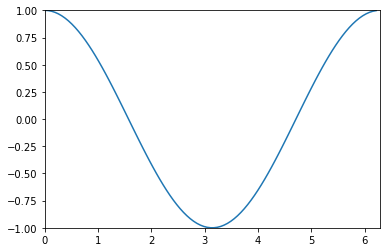

In [113]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

# Variable setup. Domain, t. Range, f.
t = np.linspace(0,2*np.pi, 100)
f = np.cos(t)

fig, ax = plt.subplots()
# Set the axis viewing limits => [x0, x1, y0, y1]
ax.axis([0, 2*np.pi, -1, 1])

l, = ax.plot([],[])

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(t[:i], f[:i])
    return l,

ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init,
                                frames=len(t), interval=20, blit=True)

display(HTML(ani.to_jshtml()))


## Question 3:

Produce a looping animation of the following parametric line:

$$
\mathbf{r}(t) = \left\langle \frac{3t}{1+t^3}, \frac{3t^2}{1+t^3}  \right\rangle
$$

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

# Variable setup. Domain, t. Range, f.
t = np.linspace(-0.3,90, 1500)
# f = np.cos(t)

x = 3*t/(1+t**3)

y =(3*t**2)/(1+t**3)

fig, ax = plt.subplots()
# Set the axis viewing limits => [x0, x1, y0, y1]
ax.axis([-2, 2, -0.1, 2])

l, = ax.plot([],[])

def init():
    l.set_data([], [])
    return l,

def animate(i):
    l.set_data(x[:i], y[:i])
    return l,

ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init,
                                frames=len(t), interval=20, blit=True)

display(HTML(ani.to_jshtml()))